# Neural Networks with TensorFlow
`pip install tensorflow`<br>
TensorFlow is a machine learning library that we can use to implement **Neural Networks** and that does all the complicated math stuff for us in an efficient way.

In [1]:
import tensorflow as tf
import numpy as np

## Data
Our goal will be to classify the handdrawn digits from the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

The features that our model gets as an input are the handdrawn images that have *shape 28, 28*<br>
The targets are the labels of these images<br>

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
import matplotlib.pyplot as plt

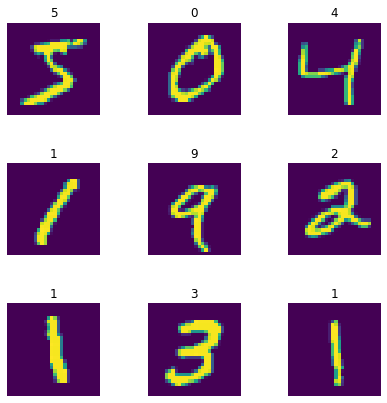

In [5]:
fig, axes = plt.subplots(3,3, figsize=(6,6))
fig.tight_layout()

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(y_train[i])
    ax.axis("off")

## Preprocessing
#### Images
Each image is a 2 dimensional array.

In [6]:
x_train[0].ndim

2

The input layer of our neural network can only take one dimension at a time.<br>
So we reshape the data from `(60000, 28, 28)` to `(60000, 784)`.

In [7]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

In [8]:
x_train.shape

(60000, 784)

#### Labels
The labels describing the handwritten digits are numbers from `0-9`.<br>

In [9]:
np.min(y_train), np.max(y_train)

(0, 9)

While our neural network could predict, with one neuron, a single number from `0-9`<br> 
it is much more stable to give our network 10 neurons and count the neuron with the highest activation as the models prediction.

So if our model has 10 output neurons, then our target also have to be of length 10<br>
and so we one-hot encode the image labels

In [10]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

Metal device set to: Apple M1 Pro


2022-06-20 18:34:06.011282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-20 18:34:06.011534: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


the position in the array matching the value of the label is now `1`

In [11]:
y_train[0].numpy()

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

<br>

## Building the **Neural Network Model**
#### using the functional API
Here we are building a very simple model that only consists of dense layers.

In [12]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [13]:
# we create an input layer with the shape of our data, 784
img_inputs = Input(shape=28*28)

# after the input layer we put a dense layer with 64 neurons
# the input to this dense leayer is the previous layer (img_inputs)
# as an activation function we choose relu as it is very often a good first choice
dense_1 = Dense(64, activation="relu")(img_inputs)

# after that we put a 2nd dense layer, also with 64 neurons, which takes again the previous layer (dense_1) as an input
dense_2 = Dense(64, activation="relu")(dense_1)

# finally define the output layer which takes again the previous layer (dense_2) as an input
# here we use softmax as an activation function to get probabilites for all classes (digits)
outputs = Dense(10, activation="softmax")(dense_2)

# from the input and output layer we build our model
model = Model(inputs=img_inputs, outputs=outputs)

We can use `.summary()` to inspect what kind of layers our model, how many parameters they have<br>
and what shape our data has after it passes through one of the layers

In [14]:
784 * 64 + 64

50240

## Training the Model

Before we can train our model we have to compile it.<br>
In this step we define a **loss function** and an **optimizer** for our model.<br>
We will start with the **mean squared error** and **stochastic gradient descent**, which are not the best choices but the most basic ones.

In [27]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    metrics=["accuracy"],
)

To train the model we pass to it the features `x_train` and the labels `y_train`.<br>
Additionaly we specify the number of epochs, so how often we pass our data through the model.<br>
We also pass a validation_split ration, this determines how much of our should be used to validate the models performance every epoch.<br> Validation part of our data is not used for training the model and can thus tell us if what the model has learned generalizes to unseen data.

In [28]:
num_epochs = 8
history = model.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2, verbose=1)

Epoch 1/8
  18/1500 [..............................] - ETA: 9s - loss: 74.8124 - accuracy: 0.1892 

2022-06-20 14:35:55.821377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1498/1500 [============================>.] - ETA: 0s - loss: 4.9717 - accuracy: 0.7217

2022-06-20 14:36:04.645368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 11s 7ms/step - loss: 4.9669 - accuracy: 0.7218 - val_loss: 1.6844 - val_accuracy: 0.8099
Epoch 2/8
1500/1500 [==============================] - 11s 7ms/step - loss: 1.3772 - accuracy: 0.8262 - val_loss: 1.1267 - val_accuracy: 0.8414
Epoch 3/8
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9558 - accuracy: 0.8514 - val_loss: 0.8460 - val_accuracy: 0.8590
Epoch 4/8
1500/1500 [==============================] - 11s 7ms/step - loss: 0.7581 - accuracy: 0.8641 - val_loss: 0.7580 - val_accuracy: 0.8578
Epoch 5/8
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6440 - accuracy: 0.8742 - val_loss: 0.6709 - val_accuracy: 0.8733
Epoch 6/8
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5652 - accuracy: 0.8826 - val_loss: 0.5988 - val_accuracy: 0.8800
Epoch 7/8
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5135 - accuracy: 0.8898 - val_loss: 0.5635 - val_accuracy: 0.8839
Ep

<br>

## Evaluating the Model


### "by hand"
We handpick some images and check how the models prediction compares to the actual target

In [25]:
def get_prediction(image):
    return np.argmax(model.predict(np.expand_dims(image, 0)))

2022-06-19 19:58:10.243116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


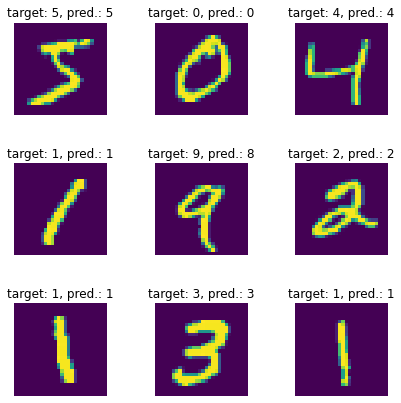

In [26]:
fig, axes = plt.subplots(3,3, figsize=(6,6))
fig.tight_layout()

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i].reshape(28,28))
    ax.set_title(f"target: {np.argmax(y_train[i])}, pred.: { get_prediction(x_train[i])}")
    ax.axis("off")

### proper evaluation

After and also sometimes during training we should check how the model perfomance on the data used for training<br>
compares to the perfomance on the unseen data.

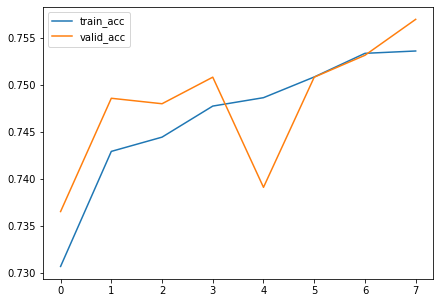

In [27]:
plt.figure(figsize=[7,5])
plt.plot(np.arange(num_epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(num_epochs), history.history["val_accuracy"], label="valid_acc")
plt.legend();

Looking at the plot we see that both training and validation accuracy are very similar and also steadily increasing.<br>
This is what we want when we train our model because it tells us that the model is neither **underfitting** nor **overfitting**.
    

### train, validation and test data
So far we used the train part of the data to train our data, we used the validation part to validate our model each epoch.<br>
So what are we doing with the test data?<br>
Usually we train our model more than once with either with a different structure (more layers, more neurons) or with different hyperparamters. After every training we check the performance of the model on the train and validation data and so it can happen that we "accidentaly" optimize the model and its hyperparameters for the validation dataset.<br>
So even though the model has not seen that data, we have and thus its not appropriate for checking the performance on actual unseen data. And thats why we need test data.

In [28]:
model.evaluate(x=x_test, y=y_test)

 24/313 [=>............................] - ETA: 1s - loss: 0.0485 - accuracy: 0.7552

2022-06-19 20:02:11.803860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0479 - accuracy: 0.7587


[0.04791482910513878, 0.7587000131607056]